<h1>Scikit Example</h1>

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
import sklearn
import sklearn.decomposition
import sklearn.manifold
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
mnist = fetch_mldata('MNIST original')

In [5]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [6]:
N_TRAIN = 60000

train_data, train_target = mnist.data[:N_TRAIN], mnist.target[:N_TRAIN]
test_data, test_target = mnist.data[N_TRAIN:], mnist.target[N_TRAIN:]

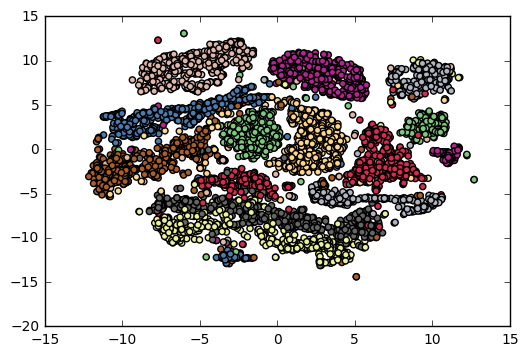

In [7]:
# Draw a small subset of the data after reducing its dimensioin

permutation = np.random.permutation(train_target.shape[0])
td = train_data[permutation][:5000]
tt = train_target[permutation][:5000]

points = sklearn.decomposition.PCA(n_components=20).fit_transform(td)
points = sklearn.manifold.TSNE(n_components=2, method='barnes_hut').fit_transform(points)
plt.scatter(points[:, 0], points[:, 1], c=tt, cmap=plt.cm.Accent)
plt.show()

<p>The classifier of MNIST digits can be seen as dimensionality reduction function $f : \mathbb{R}^{28 \times 28} \to \{0, 1, ..., 10\}$. This function is probably not linear but we might still use linear dimensionality reduction techniques to reduce the dimension of the input data from 768 to a number below 100 and apply nearest neighbour classifier only then.</p>

In [8]:
# Reducing training data dimension with PCA
permutation = np.random.permutation(train_target.shape[0])
td = train_data[permutation][:10000]
tt = train_target[permutation][:10000]

pca = sklearn.decomposition.PCA(n_components=50)
data_50d = pca.fit_transform(td)

In [9]:
# Training nearest neighbour after dimensionality reduction

nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(data_50d[:500], tt[:500])

pred = nbrs.predict(pca.transform(test_data))
true = test_target

precision = precision_score(true, pred, average='macro')
recall = recall_score(true, pred, average='macro')

print(precision)
print(recall)

0.869980951342
0.867354036298


0
1
2
3
4
5
6
7
8
9


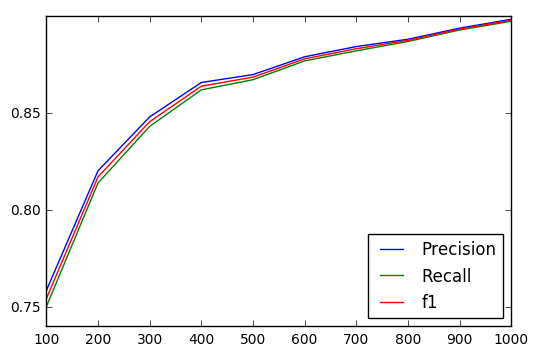

In [10]:
# Plot again the number of samples vs. precision and recall (when using the 2nd method)

n_samples = list(range(100, 1001, 100))
precisions = [None] * len(n_samples)
recalls = [None] * len(n_samples)

for i, n in enumerate(n_samples):
    print(i)
    nbrs = KNeighborsClassifier(n_neighbors=1)
    nbrs.fit(data_50d[:n], tt[:n])
    
    prediction = nbrs.predict(pca.transform(test_data))
    precisions[i] = precision_score(true, prediction, average='macro')
    recalls[i] = recall_score(true, prediction, average='macro')

precision_plot, = plt.plot(n_samples, precisions, label='Precision')
recall_plot, = plt.plot(n_samples, recalls, label='Recall')
f1s = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
f1_plot, = plt.plot(n_samples, f1s, label='f1')
plt.legend(handles=[precision_plot, recall_plot, f1_plot], loc=4)
plt.show()